## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


## 1) Get familiar with data

Commands for obtaining data info:
    b.info()
    b.sample()
    b.head() -function
    #pd.set_option('display.max_columns', 100)
    pd.set_option('display.max_columns', None)
    
    b.shape  - object 
    b.describe()
    b.describe(include='all')
    df.dtypes
    
    b.isnull().sum()
    non_null_counts = b.count()
    
    b.columns
    b.columns.to_list()
    list(b.columns)
    

In [3]:
import pandas as pd

In [4]:
! ls -l s*

-rw-rw-r-- 1 dsc dsc 7129 May  9 22:35 salabahter.txt


In [8]:
s=pd.read_csv('~/Data/challenge/searches.csv.bz2',sep='^', nrows=1000)

In [9]:
pd.set_option('display.max_columns', None)
s.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [10]:
s.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

## 2) Select the columns of interest

In [11]:
import pandas as pd
path='/home/dsc/Data/challenge'
file_name='searches.csv.bz2'

In [12]:
s=pd.read_csv(path+'/'+file_name,sep='^', usecols=['Date','Destination'], nrows=1000)

In [14]:
s.sample(10)

,Date,Destination
401,2013-01-01,SDV
905,2013-01-01,CHI
552,2013-01-01,MDE
113,2013-01-01,BCN
201,2013-01-01,CPT
534,2013-01-01,FRA
693,2013-01-01,SFO
991,2013-01-01,MDL
874,2013-01-01,LHR
229,2013-01-01,BCN


In [16]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
Date           1000 non-null object
Destination    1000 non-null object
dtypes: object(2)
memory usage: 23.4+ KB


In [17]:
s.dtypes

Date           object
Destination    object
dtype: object

## 3) What to do with NaN

In [15]:
s=s.dropna()

## 4) Make action plan
1) filter out the the searches for MAD, BCN, AGP

2) group by arr_port and month

3) plot the result 

In [ ]:
1) filter Mad, Bcn, Agp
2) change date from string to ? 
3) create YYYY-MM column
4) group by [destination, YYYY-MM]
5) sum
6) plot the results


In [28]:
import pandas as pd
path='/home/dsc/Data/challenge'
file_name='searches.csv.bz2'
filepath=path+'/'+file_name
s=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], nrows=1000)
s=s.dropna()

### 4.1) filter out the the searches for MAD, BCN, AGP
take only the rows having MAD, BCN or AGP as destination

In [18]:
sFilter=s[(s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]
sFilter.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [19]:
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])]
sFilter.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


### 4.2) group by arr_port and month


In [11]:
sFilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 4 to 992
Data columns (total 2 columns):
Date           44 non-null object
Destination    44 non-null object
dtypes: object(2)
memory usage: 1.0+ KB


In [16]:
sFilter.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [23]:
sFilter.iloc[3]

Date           2013-01-01
Destination           AGP
Name: 147, dtype: object

In [24]:
sFilter.ix[4]

Date           2013-01-01
Destination           MAD
Name: 4, dtype: object

In [25]:
sFilter.Date.iloc[0]

'2013-01-01'

In [26]:
type(sFilter.Date.iloc[0])

str

### 4.2.1) Adding new column with YYYY-MM info

### 4.2.1.1a transforming string to date with parse_dates:

In [27]:
s=pd.read_csv(path+'/'+file_name,sep='^', usecols=['Date','Destination'], parse_dates=['Date'], nrows=1000)

In [28]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Date           1000 non-null datetime64[ns]
Destination    1000 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 15.7+ KB


In [29]:
type(s.Date.iloc[0])

pandas.tslib.Timestamp

In [30]:
#this way we haveonly one element but returned as series
print s['Date'][0]

2013-01-01 00:00:00


In [31]:
s.Date.iloc[0].month

1

### 4.2.1.1b transforming string to date with pandas to_datetime():

In [33]:
s=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], nrows=1000)
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Date           1000 non-null object
Destination    1000 non-null object
dtypes: object(2)
memory usage: 15.7+ KB


In [34]:
s['Date2']=pd.to_datetime(s['Date'])
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Date           1000 non-null object
Destination    1000 non-null object
Date2          1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 23.5+ KB


In [35]:
s.drop('Date', axis=1, inplace=True)
s.sample()

,Destination,Date2
389,MSY,2013-01-01


In [39]:
s.rename(columns={'Date2':'Date'})

,Destination,Datetete
0,AUH,2013-01-01
1,MIL,2013-01-01
2,SFO,2013-01-01
3,ARN,2013-01-01
4,MAD,2013-01-01
5,BLR,2013-01-01
6,PAR,2013-01-01
7,DUB,2013-01-01
8,ACE,2013-01-01
9,BGW,2013-01-01


In [41]:
s=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], nrows=1000)
s['Date']=pd.to_datetime(s['Date'])

### 4.2.1.1 YYYY-MM
create new column from pandas timestamp data

In [42]:
s['PlotDate']=s.Date.map(lambda x: "%d-%02d"%(x.year,x.month))

In [43]:
s.sample()

,Date,Destination,PlotDate
686,2013-01-01,VIE,2013-01


### 4.2.1.2 using string and obtainig yyyy-mm directly from it

In [44]:
s=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], nrows=1000)
s.sample()

,Date,Destination
442,2013-01-01,NYC


In [45]:
a='2013-01-01'

In [46]:
a.split('-')[0]

'2013'

In [48]:
s['PlotDate']=s.Date.map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))

In [49]:
s.sample()

,Date,Destination,PlotDate
554,2013-01-01,ROM,2013-01


## 4.2 group by arr_port search month

What do we have?

In [74]:
import pandas as pd
path='/home/dsc/Data/challenge'
file_name='searches.csv.bz2'
filepath=path+'/'+file_name
s=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], parse_dates=['Date'], nrows=100000)
s=s.dropna()
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
sFilter['PlotDate']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))
sFilter.head()

,Date,Destination,PlotDate
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [75]:
sFilter_gr=sFilter.groupby(['PlotDate','Destination'])
sFilter_gr.groups.keys()

[('2013-02', 'BCN'),
 ('2013-02', 'MAD'),
 ('2013-01', 'AGP'),
 ('2013-01', 'MAD'),
 ('2013-02', 'AGP'),
 ('2013-04', 'BCN'),
 ('2013-03', 'BCN'),
 ('2013-01', 'BCN'),
 ('2013-03', 'MAD'),
 ('2013-04', 'MAD'),
 ('2013-03', 'AGP'),
 ('2013-04', 'AGP')]

In [76]:
sFilter_gr.count() #this is DF
#type(sFilter_gr.count() )

Date
PlotDate Destination      
2013-01  AGP           169
         BCN           517
         MAD           425
2013-02  AGP           147
         BCN           497
         MAD           400
2013-03  AGP           187
         BCN           536
         MAD           433
2013-04  AGP            31
         BCN           174
         MAD           147

In [77]:
sFilter_gr.Date.count() #this is Series
#type(sFilter_gr.Date.count())

PlotDate  Destination
2013-01   AGP            169
          BCN            517
          MAD            425
2013-02   AGP            147
          BCN            497
          MAD            400
2013-03   AGP            187
          BCN            536
          MAD            433
2013-04   AGP             31
          BCN            174
          MAD            147
Name: Date, dtype: int64

In [78]:
sFilter_gr2=sFilter.groupby(['PlotDate','Destination'],as_index=False)
sFilter_gr2.count()
sFilter_gr2.groups.keys()

[('2013-02', 'BCN'),
 ('2013-02', 'MAD'),
 ('2013-01', 'AGP'),
 ('2013-01', 'MAD'),
 ('2013-02', 'AGP'),
 ('2013-04', 'BCN'),
 ('2013-03', 'BCN'),
 ('2013-01', 'BCN'),
 ('2013-03', 'MAD'),
 ('2013-04', 'MAD'),
 ('2013-03', 'AGP'),
 ('2013-04', 'AGP')]

In [79]:
type(sFilter_gr.Date.count().reset_index())
#type(sFilter_gr.count().reset_index())#with reset_index we get the same

pandas.core.frame.DataFrame

In [80]:
#sFilter_gr.count().reset_index()
sFilter_gr.Date.count().reset_index()

,PlotDate,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [87]:
gr2=sFilter_gr2.count()

Destination  AGP  BCN  MAD
PlotDate                  
2013-01      169  517  425
2013-02      147  497  400
2013-03      187  536  433
2013-04       31  174  147


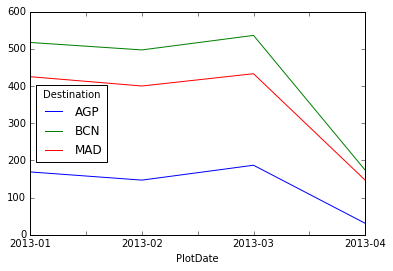

In [94]:
A=gr2.pivot('PlotDate','Destination','Date')
print A
A.plot()

## 4.3 Plotting

In [84]:
gr1=sFilter_gr.count().reset_index()
gr1

,PlotDate,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [85]:
gr1.rename(columns={'Date': 'Searches', 'PlotDate':'Month'}, inplace=True)
gr1

,Month,Destination,Searches
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


Populating the interactive namespace from numpy and matplotlib


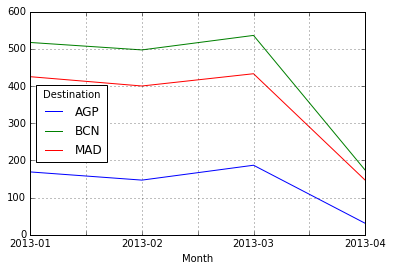

In [86]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline #ne znam jel ovo treba
#import seaborn as sns
_=gr1.pivot('Month','Destination','Searches').plot(grid=True)
#Date, Items, Values

## 4.3.b Step by Step plotting

In [75]:
gr1[gr1['Destination']=='AGP']

,Month,Destination,Searches
0,2013-01,AGP,169
3,2013-02,AGP,147
6,2013-03,AGP,187
9,2013-04,AGP,31


In [76]:
gr1[gr1['Destination']=='AGP'].reset_index()

,index,Month,Destination,Searches
0,0,2013-01,AGP,169
1,3,2013-02,AGP,147
2,6,2013-03,AGP,187
3,9,2013-04,AGP,31


In [77]:
gr1[gr1['Destination']=='AGP'].reset_index()['Searches']

0    169
1    147
2    187
3     31
Name: Searches, dtype: int64

In [78]:
list(gr1[gr1['Destination']=='AGP'].reset_index()['Searches'])

[169, 147, 187, 31]

In [79]:
agp=list(gr1[gr1['Destination']=='AGP'].reset_index()['Searches'])
mad=list(gr1[gr1['Destination']=='MAD'].reset_index()['Searches'])
bcn=list(gr1[gr1['Destination']=='BCN'].reset_index()['Searches'])

In [80]:
gr1.reset_index()['Month'].unique()

array(['2013-01', '2013-02', '2013-03', '2013-04'], dtype=object)

In [81]:
list(gr1.reset_index()['Month'].unique())

['2013-01', '2013-02', '2013-03', '2013-04']

In [82]:
plotdate=list(gr1.reset_index()['Month'].unique())

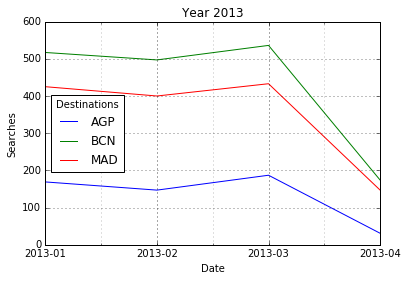

In [92]:
import numpy as np
fig=plt.figure() 
#fig.set_size_inches(12,6) 

ax = plt.gca() #get current axes
#.add_subplot(1,1,1)  
plt.xlabel("Date")
plt.ylabel("Searches")
#plt.xticks(range(len(plotdate)), plotdate,size='small')
plt.xticks(range(len(plotdate)), plotdate)

major_ticks = range(len(plotdate))                                             
minor_ticks = np.arange(0, len(plotdate), 0.5) 
plt.gca().set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)   
ax.grid(which='both') 
ax.grid(which='minor', alpha=0.5)                                                
ax.grid(which='major', alpha=1)

plt.plot(agp, label='AGP')
plt.plot(bcn, label='BCN')
plt.plot(mad, label='MAD')

plt.grid(True)

#plt.legend(["Madrid", "Barcelona", "Malaga"],loc='center left', frameon=True)
plt.legend(["AGP","BCN", "MAD"],loc='best', frameon=True, title="Destinations")

#plt.bar(range(len(y)), y, align='center')

plt.title("Year 2013")


In [73]:
#ovo ne znam zasto imam ovjde
np.arange(0, 101, 20)   

array([  0,  20,  40,  60,  80, 100])

In [77]:
range(len(plotdate)) 

[0, 1, 2, 3]

In [87]:
np.arange(0,len(plotdate),0.5) 

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5])

## 5) Adjust the code to work with Big data

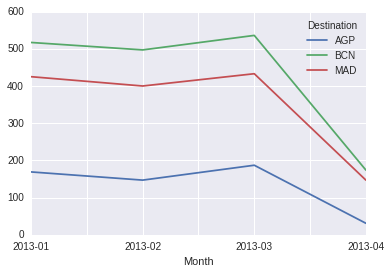

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path='/home/dsc/Data/challenge'
file_name='searches.csv.bz2'
filepath=path+'/'+file_name

s=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], parse_dates=['Date'], nrows=100000)
#s=s.dropna()
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])].dropna().copy()
sFilter['PlotDate']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))
sFilter_gr=sFilter.groupby(['PlotDate','Destination'])

gr1=sFilter_gr.count().reset_index().rename(columns={'Date': 'Searches', 'PlotDate':'Month'})
#gr1.rename(columns={'Date': 'Searches', 'PlotDate':'Month'}, inplace=True)


fig=gr1.pivot('Month','Destination','Searches').plot(grid=True)
#fig.figure.set_size_inches(12,6)

In [7]:
cd $path

/home/dsc/Data/challenge


In [12]:
! bzcat searches.csv.bz2 | head -100000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [13]:
! wc -l  searches.sample.csv

100000 searches.sample.csv


In [16]:
! bzip2 -f searches.sample.csv

In [17]:
! bzcat searches.sample.csv.bz2 | wc -l

100000


### 5.1) chunksize & append group by DF

0
1
2
3
4
5
6
7
8
9


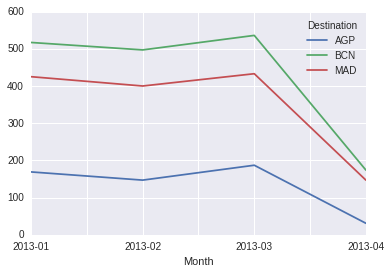

In [3]:
#parse_dates ne radi jel ide preko svih linija

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path='/home/dsc/Data/challenge'
file_name='searches.sample.csv.bz2'
#file_name='searches.csv.bz2'
filepath=path+'/'+file_name

sum_chunks=pd.DataFrame()
bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], parse_dates=['Date'], chunksize=10000)
#bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], parse_dates=['Date'], chunksize=1000000)

for i,chunk in enumerate(bc):
    print i
    sFilter = chunk[chunk['Destination'].isin(['MAD','BCN','AGP'])].dropna().copy()
    sFilter['PlotDate']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))
    sFilter_gr=sFilter.groupby(['PlotDate','Destination'])

    gr1=sFilter_gr.count().reset_index()
    sum_chunks=sum_chunks.append(gr1)
    #sum_chunks=sum_chunks.append(chunk_airports, ignore_index=True)
#sum_chunks

plot_data=sum_chunks.groupby(['PlotDate','Destination']).sum().reset_index()
plot_data.rename(columns={'Date': 'Searches', 'PlotDate':'Month'}, inplace=True)
fig=plot_data.pivot('Month','Destination','Searches').plot(grid=True)
#fig.figure.set_size_inches(12,6)

In [199]:
sum_chunks.groupby(['PlotDate','Destination']).sum().reset_index()

,PlotDate,Destination,Date
0,2013-01,AGP,108
1,2013-01,BCN,318
2,2013-01,MAD,266


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


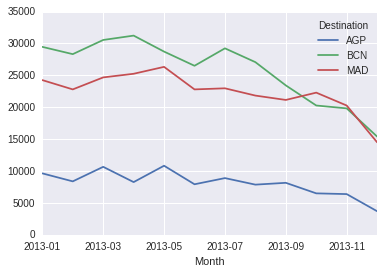

In [19]:
#direct string split also works!!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path='/home/dsc/Data/challenge'
#file_name='searches.sample.csv.bz2'
file_name='searches.csv.bz2'
filepath=path+'/'+file_name

sum_chunks=pd.DataFrame()
#bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], chunksize=10000)
#bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], skiprows=range(1,9000000), chunksize=1000000)
bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], chunksize=1000000)

for i,chunk in enumerate(bc):
    print i
    sFilter['Date']=pd.to_datetime(sFilter['Date'])
    sFilter = chunk[chunk['Destination'].isin(['MAD','BCN','AGP'])].dropna().copy()
    sFilter['PlotDate']=sFilter.Date.map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))
    sFilter_gr=sFilter.groupby(['PlotDate','Destination'])

    gr1=sFilter_gr.count().reset_index()
    sum_chunks=sum_chunks.append(gr1)
    #sum_chunks=sum_chunks.append(chunk_airports, ignore_index=True)
#sum_chunks

plot_data=sum_chunks.groupby(['PlotDate','Destination']).sum().reset_index()
plot_data.rename(columns={'Date': 'Searches', 'PlotDate':'Month'}, inplace=True)
fig=plot_data.pivot('Month','Destination','Searches').plot(grid=True)
#fig.figure.set_size_inches(12,6)



In [20]:
#but is this generic solution? what if we use the same data with another airports?
# pd.to_datetime radi ako prije uzmemo samo linije za 3 grada 
# direktno sa linijamabas i ne radi...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path='/home/dsc/Data/challenge'
file_name='searches.sample.csv.bz2'
file_name='searches.csv.bz2'
filepath=path+'/'+file_name

sum_chunks=pd.DataFrame()
#bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], chunksize=10000)
#bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], skiprows=100, chunksize=1000)
bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], skiprows=range(1,10000000), chunksize=1000000)
for i,chunk in enumerate(bc):
    print i
    chunk['Date']=pd.to_datetime(chunk['Date'])
    sFilter = chunk[chunk['Destination'].isin(['MAD','BCN','AGP'])].dropna().copy()
    sFilter['PlotDate']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))
    sFilter_gr=sFilter.groupby(['PlotDate','Destination'])

    gr1=sFilter_gr.count().reset_index()
    sum_chunks=sum_chunks.append(gr1)
    #sum_chunks=sum_chunks.append(chunk_airports, ignore_index=True)
#sum_chunks

plot_data=sum_chunks.groupby(['PlotDate','Destination']).sum().reset_index()
plot_data.rename(columns={'Date': 'Searches', 'PlotDate':'Month'}, inplace=True)
fig=plot_data.pivot('Month','Destination','Searches').plot(grid=True)
#fig.figure.set_size_inches(12,6)


0
1


ValueError: Unknown string format

### How to find out which line has problems???

In [ ]:
#or with command line
bzcat searches.sample.csv.bz2 | cut -d '^' -f 1 | grep -n -E -v "^[0-9]{4}-[0-1][0-9]-[0-3][0-9]$"> bad_search_lines.csv
bzcat searches.sample.csv.bz2 | sed 's/\s*^/^/g' > searches.clean.csv & # \s (space) #15-20 min
bzip2 searches.clean.csv &

In [1]:
import pandas as pd
#Kako bi znali koja linija ne radi...
path='/home/dsc/Data/challenge'
#file_name='searches.sample.csv.bz2'
#skip_size=700
#chunk_size=100

file_name='searches.csv.bz2'
skip_size=12000000
chunk_size=1000000

filepath=path+'/'+file_name
bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], skiprows=range(1,skip_size), chunksize=chunk_size)
#bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], skiprows=range(1,500),chunksize=100)

for i,chunk in enumerate(bc):
    print "__Block %d" %(i) 
    for row in chunk.iterrows():
        try:
            x=pd.to_datetime(row[1][0],errors='raise')
            #print row[0]+skip_size+1+i*chunk_size, row[1][0], row[1][1]
        except:
            print 'ERROR: Line', row[0]+skip_size+1+i*chunk_size, row[1][0], row[1][1]
    

__Block 0
ERROR: Line 12206183 2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV nan
ERROR: Line 12565193 2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV nan
ERROR: Line 12565203 2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV nan


KeyboardInterrupt: 

In [44]:
import pandas as pd
#Kako bi znali koja linija ne radi...
path='/home/dsc/Data/challenge'
file_name='searches.sample.csv.bz2'
skip_size=990
chunk_size=5

#file_name='searches.csv.bz2'
#skip_size=12000000
#chunk_size=1000000

filepath=path+'/'+file_name
bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], skiprows=range(1,skip_size), chunksize=chunk_size)
#bc=pd.read_csv(filepath,sep='^', usecols=['Date','Destination'], skiprows=range(1,500),chunksize=100)

for i,chunk in enumerate(bc):
    print "__Block %d" %(i) 
    for row in chunk.iterrows():
        try:
            x=pd.to_datetime(row[1][0],errors='raise')
            #print row
            print type(row)
            print type(row[1])
            print row[1]['Date']
            print row[1]['Destination']
            
        except:
            print 'ERROR: Line', row[0]+skip_size+1+i*chunk_size, row[1][0], row[1][1]
    

__Block 0
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
AMS
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
LIN
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
MDL
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
BCN
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
CHI
__Block 1
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
PAR
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
DTM
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
PER
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
HKG
<type 'tuple'>
<class 'pandas.core.series.Series'>
2013-01-01
FRA


In [41]:
S=pd.Series([1,2,3], index=list('abc'))
S.index

Index([u'a', u'b', u'c'], dtype='object')

In [ ]:
! bzcat /home/dsc/Data/challenge/searches.sample.csv.bz2 | sed -n 10p #-n=do not output by default

In [ ]:
#dont do this in python
#! bzcat /home/dsc/Data/challenge/searches.csv.bz2 | sed -n 12206183,12565193p #-n=do not output by default

In [14]:
import pandas as pd
data=[(1,'abc'),(2,'vv'),(3,'fff'),(45,'fdfd')]
df=pd.DataFrame(data,columns=['numbers','letters'])
print df
for i, row in df.iterrows():
    print "row[0]:", row[0]
    print "row[1]:", row[1]
    print "and this is number", row['numbers']
     

   numbers letters
0        1     abc
1        2      vv
2        3     fff
3       45    fdfd
row[0]: 1
row[1]: abc
and this is number 1
row[0]: 2
row[1]: vv
and this is number 2
row[0]: 3
row[1]: fff
and this is number 3
row[0]: 45
row[1]: fdfd
and this is number 45


### Iterrows example

In [61]:
s['Destination'][0]

'AUH'

In [155]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], nrows=1000)
sfilter=[]
for row in s.iterrows():
    #row 0 is index
    #row 1 are the values
    #print row[1]['Destination']
    #if row[1]['Destination']=='MAD' or row[1]['Destination']=='BCN' or row[1]['Destination']=='AGP':
    if (row[1]['Destination']=='MAD') | (row[1]['Destination']=='BCN') | (row[1]['Destination']=='AGP'):
        sfilter.append([row[1]['Destination'], row[1]['Date']]) #lista de listas
        #sfilter.append((row[1]['Destination'], row[1]['Date'])) #lista de tuplas
    

In [156]:
print len(sfilter)
sfilter[:10]

44


[['MAD', '2013-01-01'],
 ['AGP', '2013-01-01'],
 ['BCN', '2013-01-01'],
 ['AGP', '2013-01-01'],
 ['MAD', '2013-01-01'],
 ['BCN', '2013-01-01'],
 ['BCN', '2013-01-01'],
 ['BCN', '2013-01-01'],
 ['BCN', '2013-01-01'],
 ['BCN', '2013-01-01']]

### isin(), row filtering example

In [45]:
data = pd.DataFrame({'col1': [1, 3, 4, 3, 4],
                  'col2': [2, 3, 1, 2, 3],
                  'col3': [1, 5, 2, 4, 4]})
data

,col1,col2,col3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [46]:
data[[True, True, False, True, True]]

,col1,col2,col3
0,1,2,1
1,3,3,5
3,3,2,4
4,4,3,4


In [47]:
[data['col2'] > 2]

[0    False
 1     True
 2    False
 3    False
 4     True
 Name: col2, dtype: bool]

In [48]:
data[data['col2'] == 2]

,col1,col2,col3
0,1,2,1
3,3,2,4


In [49]:
data[data['col2'].isin([2])]

,col1,col2,col3
0,1,2,1
3,3,2,4


In [50]:
data[data['col2'].isin([2,3])]

,col1,col2,col3
0,1,2,1
1,3,3,5
3,3,2,4
4,4,3,4


In [158]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], nrows=1000)
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])]
sFilter.sample(5)

,Date,Destination
835,2013-01-01,AGP
780,2013-01-01,BCN
797,2013-01-01,BCN
809,2013-01-01,BCN
798,2013-01-01,MAD


## group by with sum in a column and plotting

In [249]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], parse_dates=['Date'], nrows=100000)
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
sFilter['PlotDate']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))

In [250]:
sFilter['Searches'] = 1
#sum() only returns the column which are numeric
g = sFilter.groupby(['PlotDate','Destination']).sum().reset_index()

Populating the interactive namespace from numpy and matplotlib


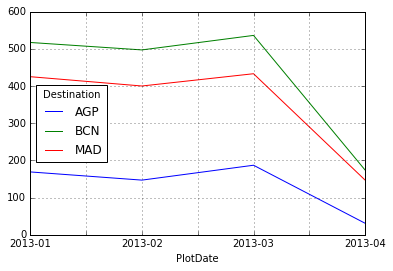

In [251]:
%pylab inline
g.pivot('PlotDate','Destination','Searches').plot(grid=True)

## Plotting with unstack and month resample

In [229]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], nrows=100000)
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
sFilter['PlotDate']=sFilter.Date.map(lambda x: "%s-%s"%(x.split('-')[0],x.split('-')[1]))

In [164]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], parse_dates=['Date'], nrows=100000)
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
sFilter['PlotDate']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))

In [165]:
sFilter.sample(5)

,Date,Destination,PlotDate
67333,2013-03-09,AGP,2013-03
5560,2013-01-06,MAD,2013-01
93542,2013-04-04,BCN,2013-04
7113,2013-01-08,BCN,2013-01
36369,2013-02-06,MAD,2013-02


In [187]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], parse_dates=['Date'], nrows=100000)
sFilter = s[s['Destination'].isin(['MAD','BCN','AGP'])].copy()
#sFilter['PlotDate']=sFilter.Date.map(lambda x: "%d-%02d"%(x.year,x.month))
sFilter_g = sFilter.groupby(['Date','Destination']).Date.count()
#monthcount = sFilter.resample('M', how=sum)
sFilter_g.head(10)

Date        Destination
2013-01-01  AGP             7
            BCN            26
            MAD            11
2013-01-02  AGP             4
            BCN             9
            MAD            11
2013-01-03  AGP             5
            BCN            13
            MAD             5
2013-01-04  AGP             5
Name: Date, dtype: int64

In [188]:
#Hierarchical indexing
#unstack - "pivots" or rotates from rows into columns
#stack - "pivots" or rotates from columns into rows
sFilter_g_uns = sFilter_g.unstack('Destination')
sFilter_g_uns.head(10)

Destination,AGP,BCN,MAD
Date,,,
2013-01-01,7,26,11
2013-01-02,4,9,11
2013-01-03,5,13,5
2013-01-04,5,18,14
2013-01-05,4,13,16
2013-01-06,4,15,10
2013-01-07,1,14,13
2013-01-08,5,18,13
2013-01-09,6,18,19


In [189]:
sFilter_g_uns2= sFilter_g_uns.copy()
sFilter_g_uns2.index = pd.to_datetime(sFilter_g_uns2.index)
sFilter_g_uns2.head()
monthcount = sFilter_g_uns2.resample('M', how=sum)
monthcount.head()

Destination,AGP,BCN,MAD
Date,,,
2013-01-31,169,517,425
2013-02-28,147,497,400
2013-03-31,187,536,433
2013-04-30,31,174,147


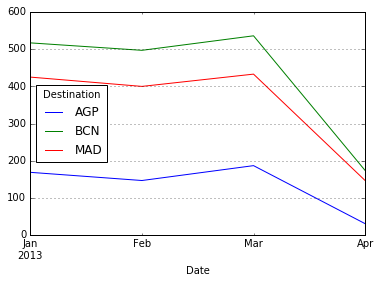

In [192]:
monthcount.plot(grid=True)

### Difference del and xdel
xdel borra objeto y todas sus referencias

del borra solo la variable

In [143]:
a=1
b=a
del b
%whos

Variable      Type           Data/Info
--------------------------------------
a             int            1
agp           list           n=4
ax            AxesSubplot    Axes(0.125,0.125;0.775x0.775)
bcn           list           n=4
fig           Figure         Figure(480x320)
g             DataFrame         PlotDate Destination  <...>-04         MAD       147
line2         list           n=1
line3         list           n=1
mad           list           n=4
major_ticks   list           n=4
minor_ticks   ndarray        8: 8 elems, type `float64`, 64 bytes
np            module         <module 'numpy' from '/ho<...>ages/numpy/__init__.pyc'>
pd            module         <module 'pandas' from '/h<...>ges/pandas/__init__.pyc'>
plotdate      list           n=4
plt           module         <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
s             DataFrame                  Date Destinat<...>[100000 rows x 2 columns]
sFilter       DataFrame                  Date Destinat<...>\n[366

In [141]:
a=1
b=a
%xdel b
%whos

Variable      Type           Data/Info
--------------------------------------
agp           list           n=4
ax            AxesSubplot    Axes(0.125,0.125;0.775x0.775)
bcn           list           n=4
fig           Figure         Figure(480x320)
g             DataFrame         PlotDate Destination  <...>-04         MAD       147
line2         list           n=1
line3         list           n=1
mad           list           n=4
major_ticks   list           n=4
minor_ticks   ndarray        8: 8 elems, type `float64`, 64 bytes
np            module         <module 'numpy' from '/ho<...>ages/numpy/__init__.pyc'>
pd            module         <module 'pandas' from '/h<...>ges/pandas/__init__.pyc'>
plotdate      list           n=4
plt           module         <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
s             DataFrame                  Date Destinat<...>[100000 rows x 2 columns]
sFilter       DataFrame                  Date Destinat<...>\n[3663 rows x 4 columns]
y          

## WHAT IS THE DIFF with and without df.copy()

In [54]:
df = pd.DataFrame({'x': [1,2]})
df_sub = df[0:1]
df_sub.x = -1
print(df)

   x
0 -1
1  2


In [53]:
#pd.options.mode.chained_assignment = None #default='warn'

In [52]:
df = pd.DataFrame({'x': [1,2]})
df_sub_copy = df[0:1].copy()
df_sub_copy.x = -1
print(df)

   x
0  1
1  2


-


-

In [195]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], nrows=1000)
df_sub = s[0:10]
df_sub.Date[2] = None
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,None,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


Warning Whether a copy or a reference is returned for a setting operation, may depend on the context. This is sometimes called chained assignment and should be avoided. See Returning a View versus Copy

Warning The chained assignment warnings / exceptions are aiming to inform the user of a possibly invalid assignment. There may be false positives; situations where a chained assignment is inadvertently reported.

In [221]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], nrows=5)
#df_sub = s[s['Destination'].isin(['MIL'])]
df_sub = s[[False, True, False, False, False]]
#df_sub = s[1:2]
df_sub.Date.ix[1] = None
print (df_sub)
s.head()

   Date Destination
1  None         MIL


/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [222]:
s=pd.read_csv('searches.csv.bz2',sep='^', usecols=['Date','Destination'], nrows=5)
#df_sub = s[s['Destination'].isin(['MIL'])]
#df_sub = s[[False, True, False, False, False]]
df_sub = s[1:2]
df_sub.Date.ix[1] = None
print(id(s), id(df_sub))
print (df_sub)
s.head()

(140310591695632, 140310594904208)
   Date Destination
1  None         MIL


/home/dsc/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Destination
0,2013-01-01,AUH
1,None,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD



## Hierarchical indexing

In [55]:
import pandas as pd
import numpy as np
print np.arange(6)
print np.arange(6).reshape(2,3)
data=pd.DataFrame(((np.arange(6)+1)*100).reshape(3,2),
                    index=pd.Index(['Jan', 'Feb', 'Mar'],name='Month'),
                  columns=pd.Index(['Mad', 'Bcn'], name='Ciudad'))

[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]


In [56]:
data

Ciudad,Mad,Bcn
Month,,
Jan,100,200
Feb,300,400
Mar,500,600


Populating the interactive namespace from numpy and matplotlib
Ciudad  Mad  Bcn
Month           
Jan     100  200
Feb     300  400
Mar     500  600


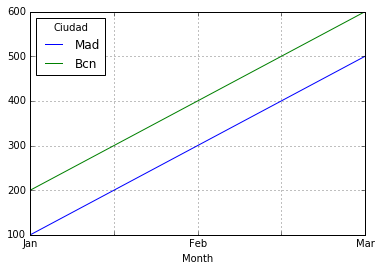

In [59]:
%pylab inline
print data
_=data.plot(grid=True)


In [73]:
_=data.pivot().plot(grid=True)

ValueError: cannot label index with a null key

In [70]:
data.unstack()

Ciudad  Month
Mad     Jan      100
        Feb      300
        Mar      500
Bcn     Jan      200
        Feb      400
        Mar      600
dtype: int64

In [71]:
data.stack()

Month  Ciudad
Jan    Mad       100
       Bcn       200
Feb    Mad       300
       Bcn       400
Mar    Mad       500
       Bcn       600
dtype: int64

In [51]:
#pivot
long_data_list=[['2015-01-01', 'One',372],
               ['2015-01-02', 'One',373],
               ['2015-01-03', 'One',377],
['2015-01-01', 'Two',34],
['2015-01-02', 'Two',74]]
data=pd.DataFrame(long_data_list,
                  columns=pd.Index(['Date', 'Item', 'Value']))

In [52]:
data

,Date,Item,Value
0,2015-01-01,One,372
1,2015-01-02,One,373
2,2015-01-03,One,377
3,2015-01-01,Two,34
4,2015-01-02,Two,74


In [54]:
data.pivot('Date', 'Item', 'Value')

Item,One,Two
Date,,
2015-01-01,372,34
2015-01-02,373,74
2015-01-03,377,NaN


In [62]:
#pivot
#pivot is just a shortcut for creating a hierarchical index using set_index and reshaping with unstack
long_data_list= [['2015-01-01', 'One',372, 'Igor'],
                ['2015-01-02', 'One',373, 'Marcos'],
                ['2015-01-03', 'One',377, 'Igor'],
                ['2015-01-01', 'Two',34, 'Julia'],
                ['2015-01-02', 'Two',74, 'Julia']]
data=pd.DataFrame(long_data_list,
                  columns=pd.Index(['Date', 'Item', 'Value', 'Responsable']))

In [63]:
data

,Date,Item,Value,Responsable
0,2015-01-01,One,372,Igor
1,2015-01-02,One,373,Marcos
2,2015-01-03,One,377,Igor
3,2015-01-01,Two,34,Julia
4,2015-01-02,Two,74,Julia


In [70]:
data.pivot('Date', 'Item', 'Value')

Item,One,Two
Date,,
2015-01-01,372,34
2015-01-02,373,74
2015-01-03,377,NaN


In [71]:
data.pivot('Date', 'Item')

Value     Responsable       
Item         One Two         One    Two
Date                                   
2015-01-01   372  34        Igor  Julia
2015-01-02   373  74      Marcos  Julia
2015-01-03   377 NaN        Igor    NaN

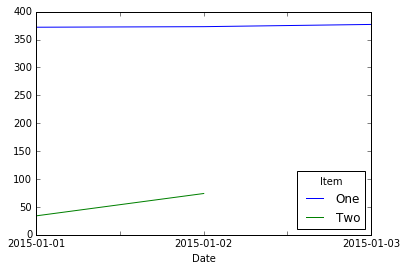

In [65]:
data.pivot('Date', 'Item', 'Value').plot()

In [96]:
b=data.set_index(['Date', 'Item'])
b

,,Value,Responsable
Date,Item,,
2015-01-01,One,372,Igor
2015-01-02,One,373,Marcos
2015-01-03,One,377,Igor
2015-01-01,Two,34,Julia
2015-01-02,Two,74,Julia


In [100]:
b.ix['2015-01-01','One']

Value           372
Responsable    Igor
Name: (2015-01-01, One), dtype: object

In [103]:
c=data.set_index(['Date', 'Item']).unstack('Item')
c

Value     Responsable       
Item         One Two         One    Two
Date                                   
2015-01-01   372  34        Igor  Julia
2015-01-02   373  74      Marcos  Julia
2015-01-03   377 NaN        Igor    NaN

In [94]:
data.groupby(['Date','Item']).unstack('Item')

AttributeError: Cannot access callable attribute 'unstack' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [88]:
data.groupby(['Date']).count().reset_index()

,Date,Item,Value,Responsable
0,2015-01-01,2,2,2
1,2015-01-02,2,2,2
2,2015-01-03,1,1,1
